# Airbnb Price Determinants

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from numpy import unique
%matplotlib inline

## Reading data set

In [2]:
airbnb = pd.read_csv("listings.csv")
#First 5 observation displays
print(airbnb.head(5))

      id                         listing_url     scrape_id last_scraped  \
0  20815  https://www.airbnb.com/rooms/20815  2.020000e+13     3/1/2021   
1  27271  https://www.airbnb.com/rooms/27271  2.020000e+13    2/27/2021   
2  28318  https://www.airbnb.com/rooms/28318  2.020000e+13     3/1/2021   
3  29241  https://www.airbnb.com/rooms/29241  2.020000e+13     3/1/2021   
4  30697  https://www.airbnb.com/rooms/30697  2.020000e+13    2/28/2021   

                                   name  \
0     The Bosphorus from The Comfy Hill   
1  Lovely apartment in perfect location   
2       Cosy home overlooking Bosphorus   
3         ↪ Istanbul, Your second house   
4             nice home in popular area   

                                         description  \
0  Watch The Bosphorus from The Comfy Hill.<br />...   
1  This is a  nicely decorated apartment in an an...   
2  <b>The space</b><br />Easy access to both brid...   
3  <b>The space</b><br />There are many interesti...   
4  <b>The 

In [3]:
#Detailed representation these features
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24519 entries, 0 to 24518
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24519 non-null  int64  
 1   listing_url                                   24519 non-null  object 
 2   scrape_id                                     24519 non-null  float64
 3   last_scraped                                  24519 non-null  object 
 4   name                                          24485 non-null  object 
 5   description                                   21194 non-null  object 
 6   neighborhood_overview                         10436 non-null  object 
 7   picture_url                                   24519 non-null  object 
 8   host_id                                       24519 non-null  int64  
 9   host_url                                      24519 non-null 

In [4]:
#Data set has 24519 samples(rows) and 74 features(columns)
airbnb.shape

(24519, 74)

In [5]:
#Displaying these columns meanly features
airbnb.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [6]:
#Basic descriptive statistics for features
airbnb.describe().T

,count,mean,std,min,25%,50%,75%,max
id,24519.0,3.324606e+07,1.391697e+07,2.081500e+04,2.683902e+07,3.809244e+07,4.437606e+07,4.834353e+07
scrape_id,24519.0,2.020000e+13,0.000000e+00,2.020000e+13,2.020000e+13,2.020000e+13,2.020000e+13,2.020000e+13
host_id,24519.0,1.763108e+08,1.298058e+08,1.176800e+04,4.104195e+07,1.895168e+08,2.918219e+08,3.901874e+08
host_response_rate,15814.0,8.299463e-01,3.309004e-01,0.000000e+00,9.000000e-01,1.000000e+00,1.000000e+00,1.000000e+00
host_acceptance_rate,14476.0,8.523266e-01,2.729801e-01,0.000000e+00,8.400000e-01,1.000000e+00,1.000000e+00,1.000000e+00
host_listings_count,24505.0,1.567292e+01,1.333541e+02,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,7.211000e+03
host_total_listings_count,24505.0,1.567292e+01,1.333541e+02,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,7.211000e+03
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,24519.0,4.102839e+01,4.626870e-02,4.081332e+01,4.100509e+01,4.103158e+01,4.104812e+01,4.148373e+01
longitude,24519.0,2.898128e+01,1.280852e-01,2.801899e+01,2.897269e+01,2.898270e+01,2.901154e+01,2.990896e+01


In [7]:
#Slightly more detailed descriptive statistics for features
airbnb.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,24519,NaN,NaN,NaN,3.32461e+07,1.3917e+07,20815,2.6839e+07,3.80924e+07,4.43761e+07,4.83435e+07
listing_url,24519,24519,https://www.airbnb.com/rooms/28536540,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scrape_id,24519,NaN,NaN,NaN,2.02e+13,0,2.02e+13,2.02e+13,2.02e+13,2.02e+13,2.02e+13
last_scraped,24519,5,2/27/2021,9111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,24485,23363,Ev,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
calculated_host_listings_count,24519,NaN,NaN,NaN,7.18027,18.598,1,1,2,7,188
calculated_host_listings_count_entire_homes,24519,NaN,NaN,NaN,3.48742,7.98194,0,0,1,3,76
calculated_host_listings_count_private_rooms,24519,NaN,NaN,NaN,3.10339,16.6511,0,0,1,1,187
calculated_host_listings_count_shared_rooms,24519,NaN,NaN,NaN,0.150292,1.18704,0,0,0,0,20


In [8]:
#Relationships of features with each other by correlation
airbnb.corr()

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,1.000000,NaN,0.633141,0.007933,0.089372,0.035688,0.035688,NaN,0.017258,-0.024430,...,-0.008077,-0.017099,0.011871,0.016069,NaN,0.048175,0.076303,0.038109,0.016342,0.150316
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.633141,NaN,1.000000,-0.114782,0.077035,-0.059174,-0.059174,NaN,0.011975,-0.042783,...,-0.080383,-0.093818,-0.072241,-0.076210,NaN,-0.105550,-0.029978,-0.085002,-0.032261,0.033648
host_response_rate,0.007933,NaN,-0.114782,1.000000,0.351539,0.050175,0.050175,NaN,0.014890,0.016452,...,0.169635,0.171839,0.139515,0.133727,NaN,0.130392,0.165211,0.054456,0.016637,0.211743
host_acceptance_rate,0.089372,NaN,0.077035,0.351539,1.000000,-0.055803,-0.055803,NaN,0.002405,-0.011158,...,-0.022489,-0.014484,-0.015815,-0.026126,NaN,-0.014322,0.145684,-0.095870,-0.006464,0.223420
host_listings_count,0.035688,NaN,-0.059174,0.050175,-0.055803,1.000000,1.000000,NaN,-0.005628,-0.008550,...,0.002796,0.004465,-0.007966,-0.005988,NaN,0.611421,0.061806,0.646612,-0.004593,0.081160
host_total_listings_count,0.035688,NaN,-0.059174,0.050175,-0.055803,1.000000,1.000000,NaN,-0.005628,-0.008550,...,0.002796,0.004465,-0.007966,-0.005988,NaN,0.611421,0.061806,0.646612,-0.004593,0.081160
neighbourhood_group_cleansed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,0.017258,NaN,0.011975,0.014890,0.002405,-0.005628,-0.005628,NaN,1.000000,-0.171077,...,-0.019418,-0.030758,-0.050066,-0.028416,NaN,0.008880,0.099770,-0.030000,-0.014243,-0.025937
longitude,-0.024430,NaN,-0.042783,0.016452,-0.011158,-0.008550,-0.008550,NaN,-0.171077,1.000000,...,0.044929,0.049133,0.061285,0.047048,NaN,-0.022669,-0.025776,-0.011811,-0.024644,0.009357


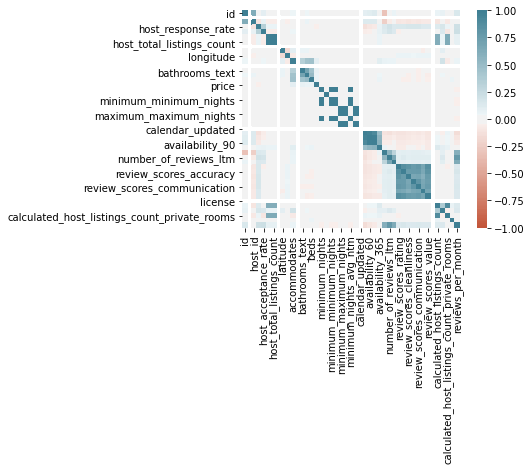

In [9]:
#Visual representation of the properties' relationships with each other by correlation
corr=airbnb.corr()
h=sns.heatmap(corr,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,220,n=200),square=True)

## Distribution of Price 

In [10]:
#Display price
print(airbnb['price'])

0         889
1         269
2         928
3         371
4         896
         ... 
24514     158
24515      82
24516    4031
24517     169
24518    1481
Name: price, Length: 24519, dtype: int64


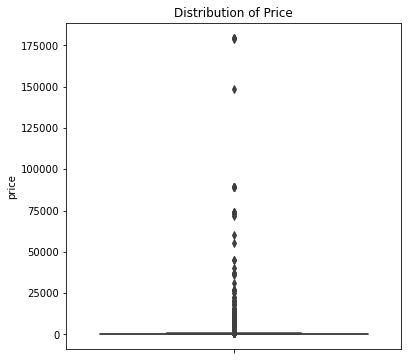

In [11]:
#Plot price distribution
plt.figure(figsize=(6,6))
sns.boxplot(y=airbnb['price'])
plt.title("Distribution of Price")
plt.show()

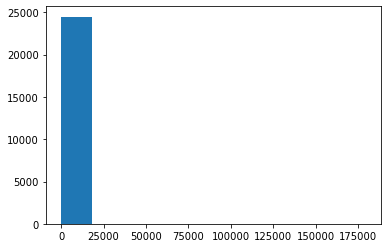

In [12]:
plt.hist(airbnb['price'])
plt.show()

In [13]:
#Function for price distribution
def price_distribution(cols):
    Price = cols
    count=0
    lower_limit=90000
    upper_limit=100000
    
    if (Price<upper_limit and Price>lower_limit):
        count=count+1
        
    return count

In [14]:
#Apply the function to the price column
num=airbnb['price'].apply(price_distribution)
print(num)

0        0
1        0
2        0
3        0
4        0
        ..
24514    0
24515    0
24516    0
24517    0
24518    0
Name: price, Length: 24519, dtype: int64


In [15]:
#If the price is in the desired range, the function result will be 1, if not result will be 0
num.value_counts()

0    24519
Name: price, dtype: int64

In [16]:
#Number of data with price equal to 10000
(airbnb['price']==10000).value_counts()

False    24507
True        12
Name: price, dtype: int64

In [17]:
#Number of data with price equal to 0
(airbnb['price']==0).value_counts()

False    24517
True         2
Name: price, dtype: int64

## Price Distribution Results
***0               :2<br>
between 0-10000 : 24440<br>
(10000:12)<br>
between 10000-20000 : 30<br>
between 20000-30000 : 7<br>
between 30000-40000 : 4<br>
between 40000-50000 : 3<br>
between 50000-60000 : 1<br>
between 60000-70000 : 0<br>
between 70000-80000 : 5<br>
between 80000-90000 : 7<br>
between 90000-100000 : 0<br>***

### Get the data in the part that is important for the price, and drop the other parts

In [18]:
airbnb=airbnb[0<airbnb.price]

In [19]:
airbnb.shape

(24517, 74)

In [20]:
airbnb=airbnb[airbnb.price<10000]

In [21]:
airbnb.shape

(24440, 74)

# Exploratory Data Analysis

## Dropping unnecessary features

id<br>
listing_url<br>
scrape_id<br>
last_scraped<br>
name<br>
description<br>
neighborhood_overview<br>
picture_url<br>
host_id<br>
host_url<br>
host_name<br>
host_since<br>
host_location<br>
host_about<br>
host_thumbnail_url<br>
host_picture_url<br>
host_neighbourhood<br>
host_verifications<br>
calendar_updated<br>
calendar_last_scraped<br>
first_review<br>
last_review<br>
license<br>


In [22]:
#Drop unnecessary features
target_columns=["id","listing_url","scrape_id","last_scraped","name","description","neighborhood_overview","picture_url",
"host_id","host_url","host_name","host_since","host_location","host_about","host_thumbnail_url","host_picture_url",
"host_neighbourhood","host_verifications","calendar_updated","calendar_last_scraped","first_review","last_review",
"license","amenities"]
airbnb.drop(target_columns,axis=1,inplace=True)

In [23]:
#Check columns
airbnb.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'r

In [24]:
#Check shape
airbnb.shape

(24440, 50)

## Handling Missing Data

In [25]:
#Are there any missing observations (values)
airbnb.isnull().values.any()

True

In [26]:
#In which variable how many
airbnb.isnull().sum()

host_response_time                               8678
host_response_rate                               8678
host_acceptance_rate                            10005
host_is_superhost                                  14
host_listings_count                                14
host_total_listings_count                          14
host_has_profile_pic                               14
host_identity_verified                             14
neighbourhood                                   14028
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                    24440
latitude                                            0
longitude                                           0
property_type                                       0
room_type                                           0
accommodates                                        0
bathrooms                                       24440
bathrooms_text                                    108
bedrooms                    

***Completely empty or almost empty columns should be dropped***

In [27]:
airbnb.drop(["neighbourhood","neighbourhood_group_cleansed","bathrooms"],axis=1,inplace=True)

***Filling missing values***

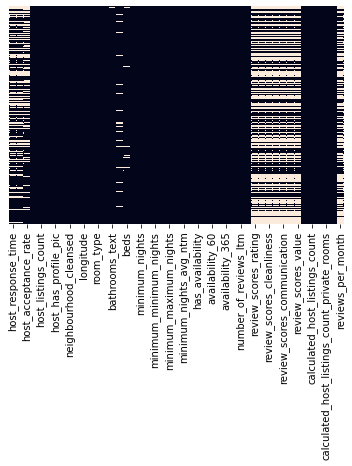

In [28]:
#Some features have missing data:
sns.heatmap(airbnb.isnull(), yticklabels = False, cbar = False)
#White color indicates missing values

In [29]:
airbnb['reviews_per_month'] = airbnb['number_of_reviews'] / 12

In [30]:
reviews = ['review_scores_value', 'review_scores_cleanliness', 'review_scores_location', 'review_scores_accuracy', 'review_scores_communication', 'review_scores_checkin', 'review_scores_rating']
for i in reviews:
  airbnb[i].fillna(airbnb[i].mean(), inplace=True)

In [31]:
#Selecting categorical data
a=airbnb.copy()
categorical_a = a.select_dtypes(include = ["object"])
#Total class numbers of host_response_time categorical data
print(categorical_a["host_response_time"].value_counts().count())
categorical_a["host_response_time"].value_counts()

4


within an hour        9557
a few days or more    2195
within a few hours    2175
within a day          1835
Name: host_response_time, dtype: int64

In [32]:
host_columns = ['host_response_time', 'host_response_rate','host_acceptance_rate','host_is_superhost','host_listings_count',
'host_total_listings_count','host_has_profile_pic','host_identity_verified']

for i in host_columns:
  airbnb[i].fillna(airbnb[i].value_counts().idxmax(), inplace=True)

In [33]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24440 entries, 0 to 24518
Data columns (total 47 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_time                            24440 non-null  object 
 1   host_response_rate                            24440 non-null  float64
 2   host_acceptance_rate                          24440 non-null  float64
 3   host_is_superhost                             24440 non-null  object 
 4   host_listings_count                           24440 non-null  float64
 5   host_total_listings_count                     24440 non-null  float64
 6   host_has_profile_pic                          24440 non-null  object 
 7   host_identity_verified                        24440 non-null  object 
 8   neighbourhood_cleansed                        24440 non-null  object 
 9   latitude                                      24440 non-null 

In [34]:
cols = ['beds', 'bedrooms','bathrooms_text']
for i in cols:
  airbnb[i].fillna(airbnb[i].mean(), inplace=True)

In [35]:
#In which variable how many
airbnb.isnull().sum()

host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms_text                                  0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0


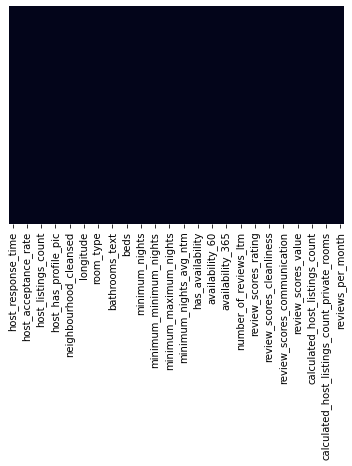

In [36]:
#Some features have missing data:
sns.heatmap(airbnb.isnull(), yticklabels = False, cbar = False)
#White color indicates missing values

## Handling Categorical Features

In [37]:
#Selecting categorical data
a=airbnb.copy()
categorical_a = a.select_dtypes(include = ["object"])
list(categorical_a)

['host_response_time',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'has_availability',
 'instant_bookable']

In [38]:
#Total class numbers of host_response_time categorical data
print(categorical_a["host_response_time"].value_counts().count())
categorical_a["host_response_time"].value_counts()

4


within an hour        18235
a few days or more     2195
within a few hours     2175
within a day           1835
Name: host_response_time, dtype: int64

In [39]:
#Converting categorical variables into "dummy" or indicator variables 
host_response_time_new=pd.get_dummies(airbnb['host_response_time'])
host_response_time_new.head()

,a few days or more,within a day,within a few hours,within an hour
0,0,0,0,1
1,0,0,0,1
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1


In [40]:
#Total class numbers of host_is_superhost categorical data
print(categorical_a["host_is_superhost"].value_counts().count())
categorical_a["host_is_superhost"].value_counts()

2


f    21210
t     3230
Name: host_is_superhost, dtype: int64

In [41]:
#Converting categorical variables into "dummy" or indicator variables 
host_is_superhost_new=pd.get_dummies(airbnb['host_is_superhost'])
host_is_superhost_new.head()

,f,t
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [42]:
#Total class numbers of host_has_profile_pic categorical data
print(categorical_a["host_has_profile_pic"].value_counts().count())
categorical_a["host_has_profile_pic"].value_counts()

2


t    24314
f      126
Name: host_has_profile_pic, dtype: int64

In [43]:
#Converting categorical variables into "dummy" or indicator variables 
host_has_profile_pic_new=pd.get_dummies(airbnb['host_has_profile_pic'])
host_has_profile_pic_new.head()

,f,t
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [44]:
#Total class numbers of host_identity_verified categorical data
print(categorical_a["host_identity_verified"].value_counts().count())
categorical_a["host_identity_verified"].value_counts()

2


t    14715
f     9725
Name: host_identity_verified, dtype: int64

In [45]:
#Converting categorical variables into "dummy" or indicator variables 
host_identity_verified_new=pd.get_dummies(airbnb['host_identity_verified'])
host_identity_verified_new.head()

,f,t
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1


In [46]:
#Total class numbers of neighbourhood_cleansed categorical data
print(categorical_a["neighbourhood_cleansed"].value_counts().count())
categorical_a["neighbourhood_cleansed"].value_counts()

39


Beyoglu          6664
Sisli            3509
Fatih            3304
Kadikoy          2259
Besiktas         1627
Uskudar           724
Esenyurt          720
Kagithane         661
Atasehir          397
Maltepe           386
Sariyer           318
Bakirkoy          292
Basaksehir        281
Avcilar           256
Umraniye          239
Eyup              233
Bagcilar          231
Bahcelievler      231
Pendik            231
Kartal            203
Adalar            194
Kucukcekmece      191
Sile              177
Zeytinburnu       116
Beylikduzu        115
Buyukcekmece      113
Beykoz            109
Tuzla             106
Arnavutkoy         89
Gaziosmanpasa      83
Gungoren           72
Cekmekoy           60
Esenler            53
Sancaktepe         53
Silivri            43
Bayrampasa         37
Sultangazi         23
Catalca            21
Sultanbeyli        19
Name: neighbourhood_cleansed, dtype: int64

In [47]:
#Converting categorical variables into "dummy" or indicator variables 
neighbourhood=pd.get_dummies(airbnb['neighbourhood_cleansed'])
neighbourhood.head()

,Adalar,Arnavutkoy,Atasehir,Avcilar,Bagcilar,Bahcelievler,Bakirkoy,Basaksehir,Bayrampasa,Besiktas,...,Sariyer,Sile,Silivri,Sisli,Sultanbeyli,Sultangazi,Tuzla,Umraniye,Uskudar,Zeytinburnu
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
#Total class numbers of property_type categorical data
print(categorical_a["property_type"].value_counts().count())
categorical_a["property_type"].value_counts()

95


Entire apartment             8385
Private room in apartment    5519
Room in boutique hotel       1567
Entire serviced apartment    1380
Room in aparthotel            832
                             ... 
Windmill                        1
Entire hostel                   1
Shared room in cabin            1
Yurt                            1
Private room in pension         1
Name: property_type, Length: 95, dtype: int64

In [49]:
#Detailed representation of property_type 
pd.set_option('display.max_rows', None)
print(categorical_a["property_type"].value_counts())

Entire apartment                      8385
Private room in apartment             5519
Room in boutique hotel                1567
Entire serviced apartment             1380
Room in aparthotel                     832
Entire house                           797
Room in hotel                          795
Private room in house                  711
Private room in bed and breakfast      587
Entire condominium                     464
Private room in serviced apartment     382
Shared room in apartment               352
Private room in condominium            343
Private room in townhouse              313
Entire townhouse                       246
Entire loft                            233
Entire villa                           214
Private room in loft                   158
Room in serviced apartment             133
Shared room in hostel                   87
Private room in hostel                  72
Private room in villa                   71
Room in bed and breakfast               66
Shared room

In [50]:
#Converting categorical variables into "dummy" or indicator variables 
house_type=pd.get_dummies(airbnb['property_type'])
house_type.head()

,Boat,Camper/RV,Campsite,Casa particular,Castle,Dome house,Earth house,Entire apartment,Entire bed and breakfast,Entire bungalow,...,Shared room in serviced apartment,Shared room in tiny house,Shared room in townhouse,Shared room in villa,Shared room in yurt,Tent,Tiny house,Treehouse,Windmill,Yurt
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#Total class numbers of room_type categorical data
print(categorical_a["room_type"].value_counts().count())
categorical_a["room_type"].value_counts()

4


Entire home/apt    12384
Private room       10577
Hotel room           798
Shared room          681
Name: room_type, dtype: int64

In [52]:
#Converting categorical variables into "dummy" or indicator variables 
room_type_new=pd.get_dummies(airbnb['room_type'])
room_type_new.head()

,Entire home/apt,Hotel room,Private room,Shared room
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0


In [53]:
#Total class numbers of has_availability categorical data
print(categorical_a["has_availability"].value_counts().count())
categorical_a["has_availability"].value_counts()

2


t    23380
f     1060
Name: has_availability, dtype: int64

In [54]:
#Converting categorical variables into "dummy" or indicator variables 
has_availability_new=pd.get_dummies(airbnb['has_availability'])
has_availability_new.head()

,f,t
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [55]:
#Total class numbers of instant_bookable categorical data
print(categorical_a["instant_bookable"].value_counts().count())
categorical_a["instant_bookable"].value_counts()

2


t    13521
f    10919
Name: instant_bookable, dtype: int64

In [56]:
#Converting categorical variables into "dummy" or indicator variables 
instant_bookable_new=pd.get_dummies(airbnb['instant_bookable'])
instant_bookable_new.head()

,f,t
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [57]:
# Add new dummy columns to data frame
airbnb= pd.concat([airbnb,neighbourhood,house_type,room_type_new],axis = 1)
airbnb.drop(['host_response_time','host_is_superhost','host_has_profile_pic','host_identity_verified','neighbourhood_cleansed','property_type','room_type','has_availability','instant_bookable'],axis = 1, inplace = True)

In [58]:
airbnb.drop(['Shared room','Private room','Entire home/apt'],axis = 1, inplace = True)

In [59]:
airbnb= pd.concat([airbnb,room_type_new],axis = 1)

In [60]:
airbnb.shape

(24440, 174)

In [61]:
#Detailed representation of airbnb columns
pd.set_option('display.max_rows', None)
list(airbnb.columns)

['host_response_rate',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month',
 'Adalar',
 'Arnavutkoy',
 'Atasehir',
 'Avcilar',
 'B

In [62]:
#Selecting categorical data
a=airbnb.copy()
categorical_a = a.select_dtypes(include = ["object"])
list(categorical_a)

[]

In [63]:
#Are there any missing observations (values)
airbnb.isnull().values.any()

False